   gameid  tourneyid    tie  winnerid           winnername  winnerscore  \
0       1          1  False       268  Harriette Lakernick            0   
1       2          1  False       268  Harriette Lakernick            0   
2       3          1  False       268  Harriette Lakernick            0   
3       4          1  False       268  Harriette Lakernick            0   
4       5          1  False       268  Harriette Lakernick            0   

   winneroldrating  winnernewrating  winnerpos  loserid         losername  \
0             1568             1684          1      429  Patricia Barrett   
1             1568             1684          1      435        Chris Cree   
2             1568             1684          1      441  Caesar Jaramillo   
3             1568             1684          1      456     Mike Chitwood   
4             1568             1684          1     1334       Nancy Scott   

   loserscore  loseroldrating  losernewrating  loserpos  round  division  \
0         

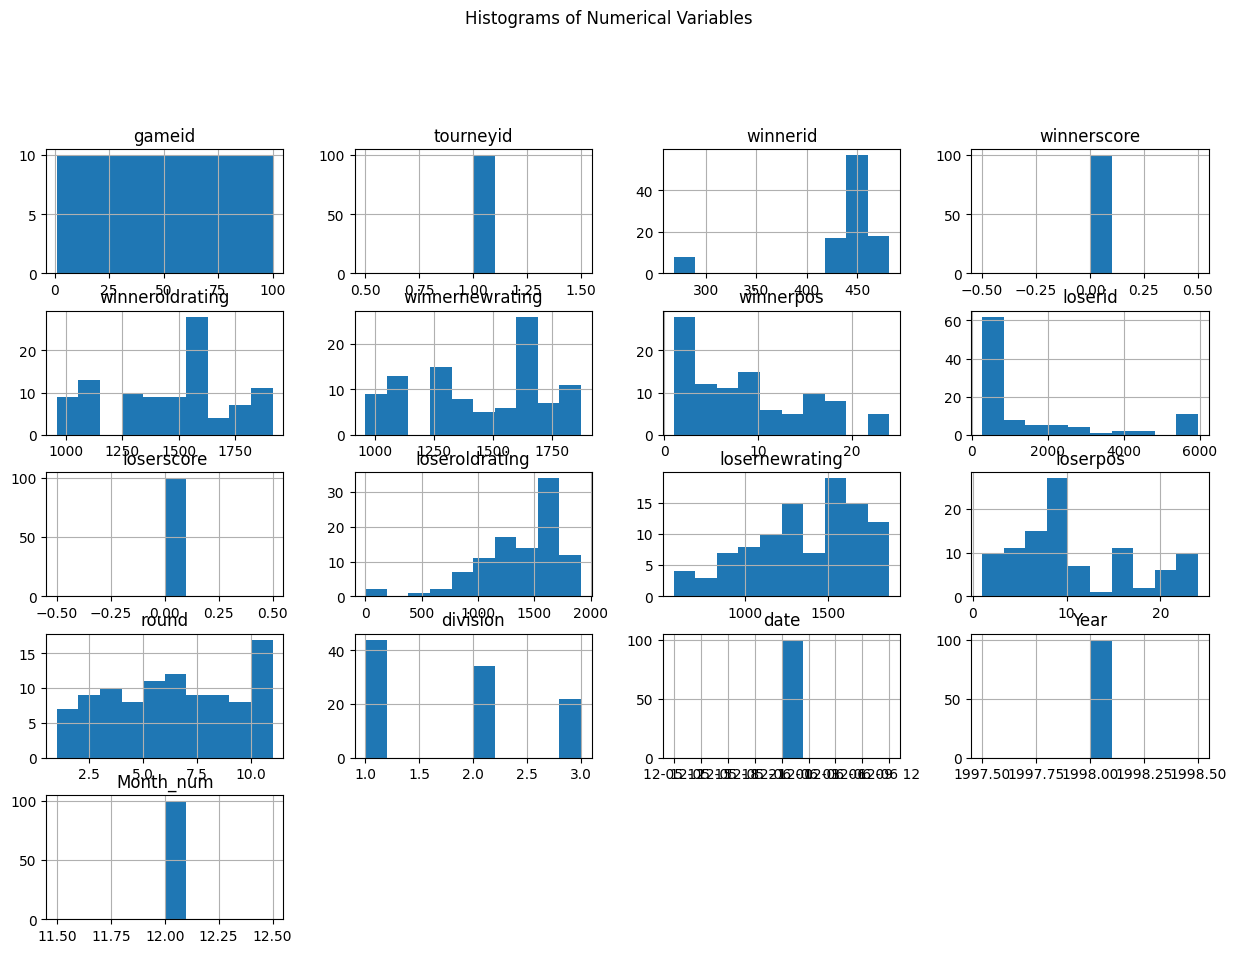

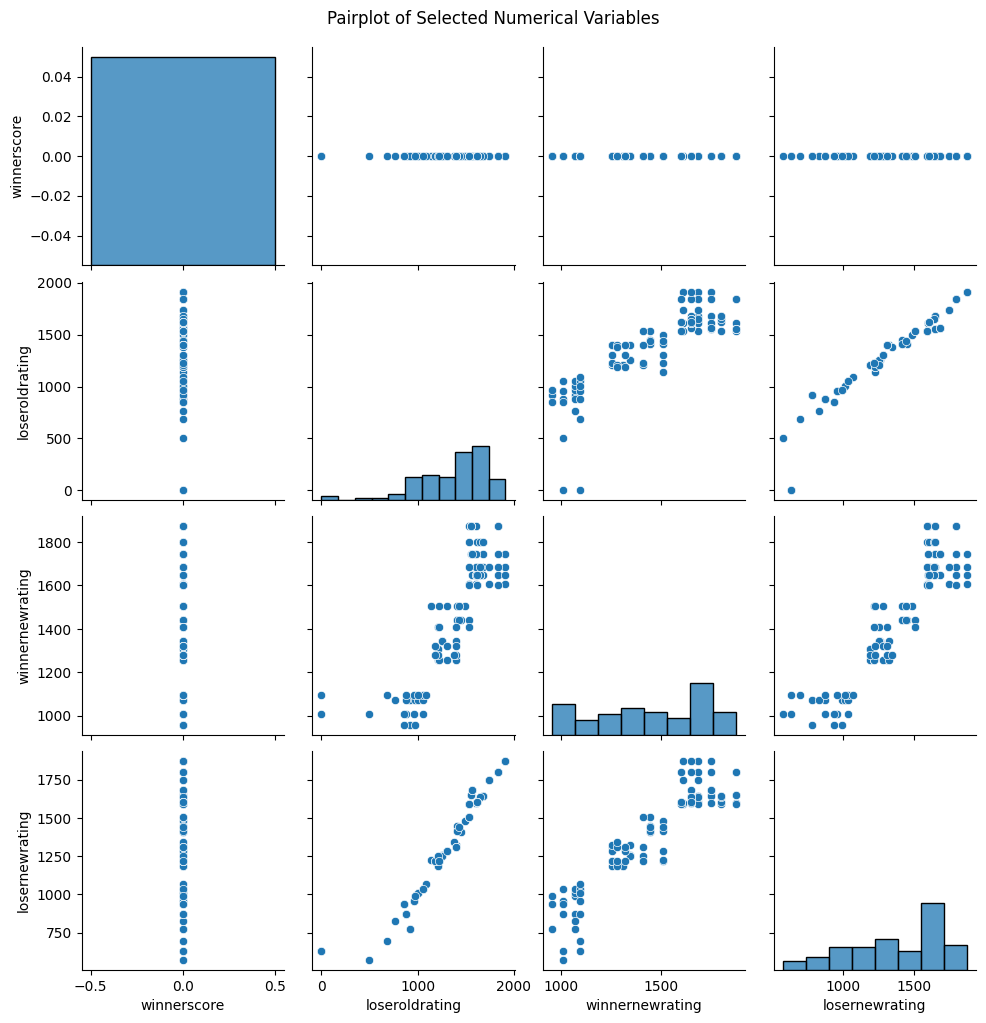

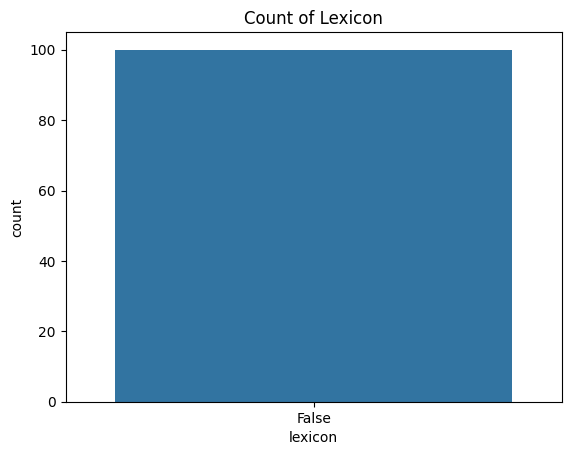

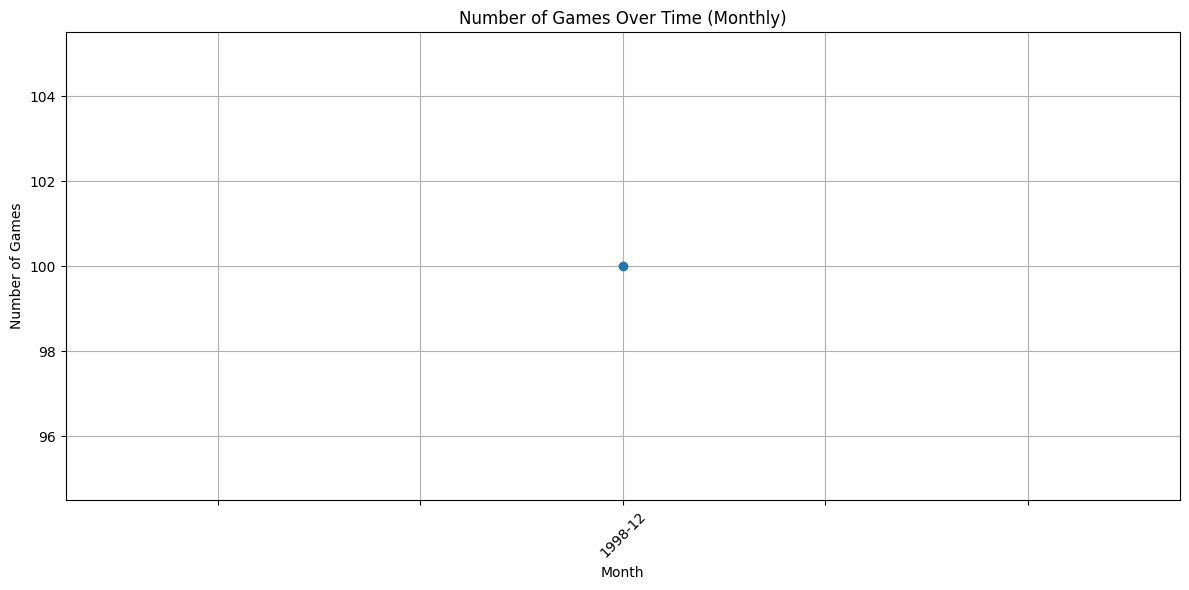

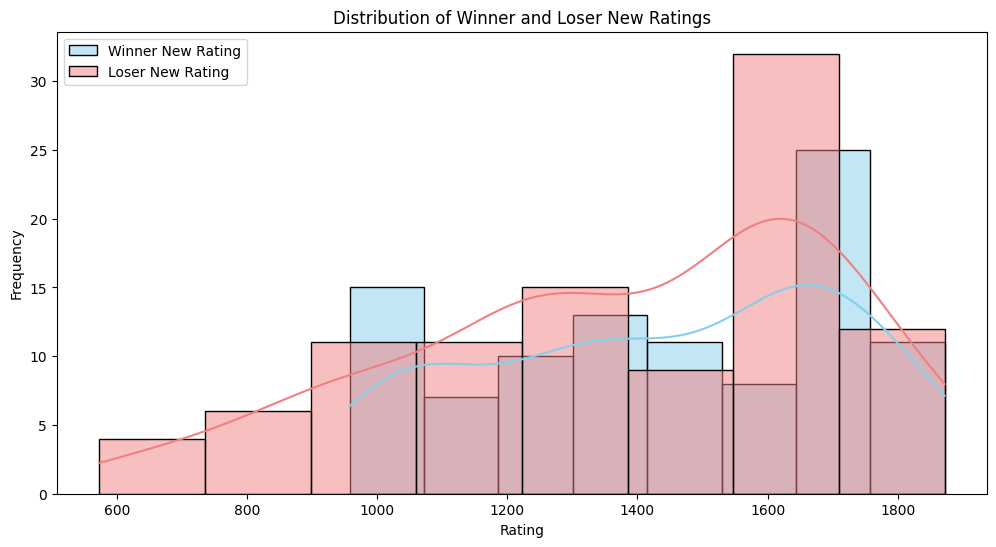

In [ ]:
   # -------------------------
# Step 1: Import Libraries
# -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import numpy as np

# -------------------------
# Step 2: Load Dataset
# -------------------------
df = pd.read_csv("saicsvfile.csv")

# Check first rows and column names
print(df.head())
print(df.columns)

# -------------------------
# Step 3: Data Preprocessing
# -------------------------
# Convert 'date' column to datetime objects if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
    df['Year'] = df['date'].dt.year
    df['Month_num'] = df['date'].dt.month
    df['Month'] = df['date'].dt.strftime('%Y-%m') # Create a Year-Month string for plotting

# -------------------------
# Step 4: Basic Data Exploration (Histograms of numerical columns)
# -------------------------
df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.show()


# -------------------------
# Step 5: Pairplot of some relevant numerical columns
# -------------------------
# Select a few numerical columns for pairplot
numerical_cols = ['winnerscore', 'loseroldrating', 'winnernewrating', 'losernewrating']
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Selected Numerical Variables", y=1.02)
plt.show()

# -------------------------
# Step 6: Count plot of Lexicon
# -------------------------
if 'lexicon' in df.columns:
    sns.countplot(x='lexicon', data=df)
    plt.title("Count of Lexicon")
    plt.show()

# -------------------------
# Step 7: Time Series of the number of games over time (by month)
# -------------------------
if 'Month' in df.columns:
    monthly_counts = df['Month'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(kind='line', marker='o')
    plt.title("Number of Games Over Time (Monthly)")
    plt.xlabel("Month")
    plt.ylabel("Number of Games")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------
# Step 8: Distribution of winner and loser ratings
# -------------------------
plt.figure(figsize=(12, 6))
sns.histplot(df['winnernewrating'], kde=True, color='skyblue', label='Winner New Rating')
sns.histplot(df['losernewrating'], kde=True, color='lightcoral', label='Loser New Rating')
plt.title("Distribution of Winner and Loser New Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()